![](https://i.imgur.com/0AUxkXt.png)

# Lab 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Example - San Francisco city employee salary data

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.


### Step 1 - Exploration Ideas

1. How have salaries changed over time between different groups of people?
2. How are base pay, overtime pay, and benefits allocated between different groups?
4. How is budget allocated based on different groups and responsibilities?

### Step 2 - Checking the data

**Import tools set**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Fill the blanks
sal = pd.read_csv('gdrive/My Drive/CoderSchool-DAwP/Data/Salaries.csv')

**Check out head(), sample(), info(), describe()**

In [4]:
# Fix the error
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
# Fix the error
sal.sample(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
3077,3078,LIZA FERNANDEZ,REGISTERED NURSE,125885.10,4604.39,9586.85,NaN,140076.34,140076.34,2011,NaN,San Francisco,NaN
117812,117813,Stella Marie H Santos,Registered Nurse,108432.29,6695.48,5245.07,37858.47,120372.84,158231.31,2014,NaN,San Francisco,NaN
3434,3435,RONIE TATAD,REGISTERED NURSE,108045.95,4669.92,23682.30,NaN,136398.17,136398.17,2011,NaN,San Francisco,NaN
36954,36955,Steven Miller,Firefighter,110847.13,67848.40,15490.64,39119.20,194186.17,233305.37,2012,NaN,San Francisco,NaN
24066,24067,MARCUS EDWARDS,PORTER,46027.53,5183.62,782.00,NaN,51993.15,51993.15,2011,NaN,San Francisco,NaN


In [6]:
# Fix the error
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [7]:
# Fix the error
sal.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


### Step 3 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check duplication in columns in which the data must be unique**

In [8]:
# Id must be unique
# So the number of unique values must be equal the number of rows
# Fill the blanks
sal['Id'].nunique() == sal['Id'].count()

True

**Change the type to category**

In [0]:
sal['Id'] = sal['Id'].astype('category')

# Change Year to be a categorical variable too
# Your code here
sal['Year'] = sal['Year'].astype('category')


**Drop unnecessary columns**

In [0]:
# Look at the info() again, which columns you can drop immediately?
# Fill the blanks
sal.drop(columns=['Notes', 'Status'], inplace=True)

In [0]:
# Are there any other columns that don't bring us much information?
# Drop them coldbloodedly
# Your code here
sal.drop(columns=['Agency'], inplace=True)

In [12]:
# Check again with info()
# Your code here
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
Id                  148654 non-null category
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null category
dtypes: category(2), float64(6), object(2)
memory usage: 15.9+ MB


**Check for NaN values**

In [13]:
# Fill the blank
sal.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

**Examine few examples of NaN values**

In [14]:
# List all NaN values of OtherPay
# Fill the blanks
sal[sal['OtherPay'].isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014


**Drop missing values of OtherPay and OvertimePay**

In [0]:
# Option 1
# sal.drop(labels=[148646, 148650, 148651, 148652], axis=0)

# Something cooler
# Solution: Select data that OtherPay is not null and assign it to the dataframe 'sal'
# Your code here
# sal = sal[~sal['OtherPay'].isnull()]
sal = sal[sal['OtherPay'].notnull()]

**Analize missing values of BasePay and Benefits**

In [16]:
# Select 5 sample of data that BasePay is null
# Your code here
sal[sal['BasePay'].isnull()].sample(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
106886,106887,George Yamasaki,"Commissioner 16.700c, No Pay",NaN,0.0,0.00,7959.18,0.00,7959.18,2013
106384,106385,Elaine M Vuong,Senior Eligibility Worker,NaN,0.0,752.07,7959.18,752.07,8711.25,2013
106083,106084,Ka S Pang,Transit Operator,NaN,0.0,1708.32,7959.18,1708.32,9667.50,2013
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013
106646,106647,Tina G Winston,Transit Operator,NaN,0.0,127.23,7959.18,127.23,8086.41,2013


**For BasePay and Benefits, it is clear that NaN values are zeroes (from TotalPay and TotalPayBenefits).**

**So, simply fill NaN values with 0**

In [0]:
# Fill the blanks
sal['Benefits'].fillna(value=0, inplace=True)

In [0]:
# Fill the blanks
sal['BasePay'].fillna(value=0, inplace=True)

In [19]:
# Let check for NaN values again
# Your code here
sal.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

**Min values of some payments are negative. Let's check it out**

In [20]:
# Select data that has negative TotalPay or TotalPayBenefits
# Fill the blanks
sal[(sal['TotalPay'] < 0) | (sal['TotalPayBenefits'] < 0)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
110528,110529,Timothy E Gibson,Police Officer 3,0.0,0.0,0.00,-2.73,0.00,-2.73,2013
110529,110530,Mark E Laherty,Police Officer 3,0.0,0.0,0.00,-8.20,0.00,-8.20,2013
110530,110531,David P Kucia,Police Officer 3,0.0,0.0,0.00,-33.89,0.00,-33.89,2013
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014


**There are only 4 of them, we can safely drop these data**

In [0]:
# Your code here
sal = sal[~((sal['TotalPay'] < 0) | (sal['TotalPayBenefits'] < 0))]

**Identify any errors or miscoding of variables**

In [22]:
# Check the unique values of Year
# Your code here
sal['Year'].unique()

[2011, 2012, 2013, 2014]
Categories (4, int64): [2011, 2012, 2013, 2014]

Check duplication

In [0]:
# Apply strip() on EmployeeName and Jobtitle 
# to remove all the leading and trailing spaces
# Fill the blanks
sal['EmployeeName'] = sal['EmployeeName'].str.strip()
sal['JobTitle'] = sal['JobTitle'].str.strip()

In [24]:
# Check the number of unique value of EmployeeName
sal['EmployeeName'].nunique()

110806

In [25]:
# Check the number of unique value of EmployeeName in lower case
# Fill the blanks
sal['EmployeeName'].str.lower().nunique()

80455

In [26]:
# Do the same with JobTitle
# Fill the blank
print(sal['JobTitle'].nunique())
print(sal['JobTitle'].str.lower().nunique())


2158
1636


In [27]:
# Select the most common name
# Something wrong, fix the error
names = sal['EmployeeName'].str.lower().value_counts()
sample = names[names > 1].head(1).index
sal[sal['EmployeeName'].str.lower().isin(sample)]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
3824,3825,KEVIN LEE,POLICE OFFICER III,112401.08,19374.72,1062.10,0.00,132837.90,132837.90,2011
4036,4037,KEVIN LEE,POLICE OFFICER II,108000.94,17468.40,6025.54,0.00,131494.88,131494.88,2011
5279,5280,KEVIN LEE,ELECTRICAL TRANSIT SYSTEM MECHANIC,77580.68,36378.97,8858.96,0.00,122818.61,122818.61,2011
13169,13170,KEVIN LEE,DEPUTY COURT CLERK III,83693.01,0.00,609.60,0.00,84302.61,84302.61,2011
13419,13420,KEVIN LEE,DEPUTY COURT CLERK III,83560.00,0.00,0.00,0.00,83560.00,83560.00,2011
15312,15313,KEVIN LEE,PERSONNEL ANALYST,76786.31,0.00,0.00,0.00,76786.31,76786.31,2011
17163,17164,KEVIN LEE,SENIOR PARKING CONTROL OFFICER,65324.60,4944.02,686.93,0.00,70955.55,70955.55,2011
17646,17647,KEVIN LEE,IS ADMINISTRATOR II,66349.74,718.23,2325.47,0.00,69393.44,69393.44,2011
27053,27054,KEVIN LEE,TRANSIT OPERATOR,31501.33,5003.46,770.75,0.00,37275.54,37275.54,2011
39715,39716,Kevin Lee,Police Officer 3,115866.90,23523.30,9313.54,34906.20,148703.74,183609.94,2012


*The names are duplicated because the data describes one person in different years or just because there are people who have same name. It's ok so we only need to uppercase all of the name to eliminate case sensitive.*

*But there are definitely some duplication of Job Title, example `Police Officer 3` and `POLICE OFFICER III`*

In [0]:
# Replace Name and Job Title with its uppercase
# Fill the blanks
sal['EmployeeName'] = sal['EmployeeName'].str.upper()
sal['JobTitle'] = sal['JobTitle'].str.upper()

In [29]:
# Write a regular expression to select JobTitle that ends with a digit
# Fill the blank
sal['JobTitle'][sal['JobTitle'].str.contains('\d$', regex=True)].value_counts()

POLICE OFFICER 3                 2418
POLICE OFFICER 2                 1141
SERGEANT 3                       1047
LIBRARIAN 1                       530
HEALTH WORKER 3                   438
HEALTH WORKER 2                   415
INSPECTOR 3                       318
LIEUTENANT 3                      303
SECRETARY 2                       301
LIBRARY TECHNICAL ASSISTANT 1     237
EXECUTIVE SECRETARY 1             184
LEGAL SECRETARY 1                 184
EXECUTIVE SECRETARY 2             178
HEALTH CARE BILLING CLERK 2       177
LIBRARIAN 2                       174
PLANNER 3                         174
EMPLOYMENT & TRAINING SPEC 3      167
HEALTH PROGRAM COORDINATOR 3      167
HEALTH WORKER 1                   163
SR. COMMUNITY DEVL SPC 1          148
GENERAL LABORER SUPERVISOR 1      137
SERGEANT 2                        131
IS ADMINISTRATOR 2                113
PLANNER 2                         106
COMMUNICATIONS DISPATCHER 1       106
CAPTAIN 3                         101
ENGINEERING 

In [30]:
# Write a regex that count all type of POLICE OFFICER
# Fill the blank
sal['JobTitle'][sal['JobTitle'].str.contains('^POLICE OFFICER', regex=True)].value_counts()

POLICE OFFICER 3      2418
POLICE OFFICER        1476
POLICE OFFICER 2      1141
POLICE OFFICER III     779
POLICE OFFICER I       467
POLICE OFFICER II      361
Name: JobTitle, dtype: int64

In [31]:
# This is a simple function to transform roman number
def transform_roman(s):
    d = {'I':1, 'II':2, 'III':3, 'IV':4, 'V':5, 'VI':6, 'VII':7, 'VIII':8, 'IX':9, 'X':10, 
        'XI':11, 'XII':12, 'XIII':13, 'XIV':14, 'XV':15, 'XVI':16, 'XVII':17, 'XVIII':18, 'XIX':19, 'XX':20}
    
    s_split = s.split()
    if s_split[-1] in d.keys():
        s_split[-1] = str(d[s_split[-1]])
    return ' '.join(s_split)

# Test it out
transform_roman('POLICE OFFICER III')

'POLICE OFFICER 3'

In [0]:
# Apply the function above to the column JobTitle
# Fill the blank
sal['JobTitle'] = sal['JobTitle'].apply(transform_roman)

### Step 4 - EDA

**Plot categorical data**

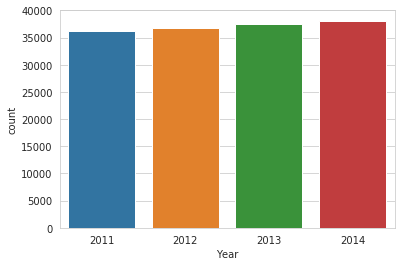

In [33]:
sns.countplot(x='Year', data=sal)
# What can you tell about this?

**Top 5 common job titles**

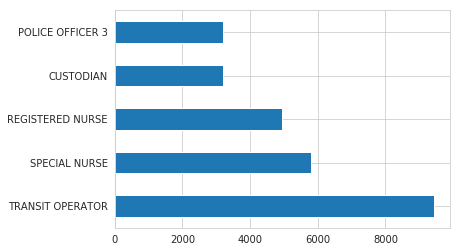

In [34]:
# Fill the blanks
sal['JobTitle'].value_counts().head().plot(kind='barh')

**Distribution of numerical data**

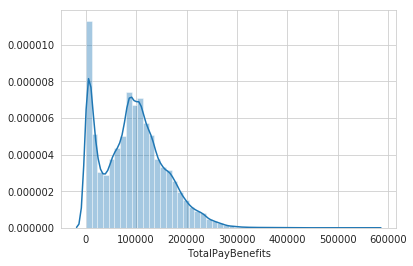

In [35]:
# Run this
sns.distplot(sal['TotalPayBenefits'])

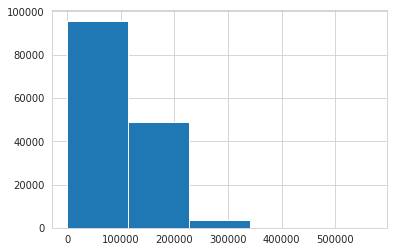

In [36]:
# Histogram is sensitive with the bins, try some examples to prove that
plt.hist(sal['TotalPayBenefits'], bins=5)
plt.show()

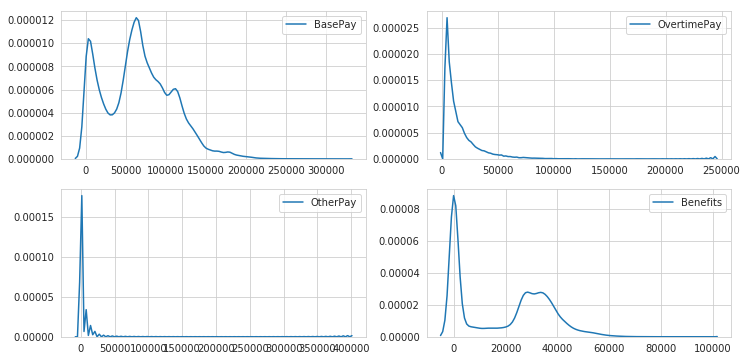

In [37]:
# Plot these diagrams in a dashboard with two rows and two columns

f, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.kdeplot(sal['BasePay'], ax=axes[0,0])
sns.kdeplot(sal['OvertimePay'], ax=axes[0,1])
sns.kdeplot(sal['OtherPay'], ax=axes[1,0])
sns.kdeplot(sal['Benefits'], ax=axes[1,1])

plt.show()

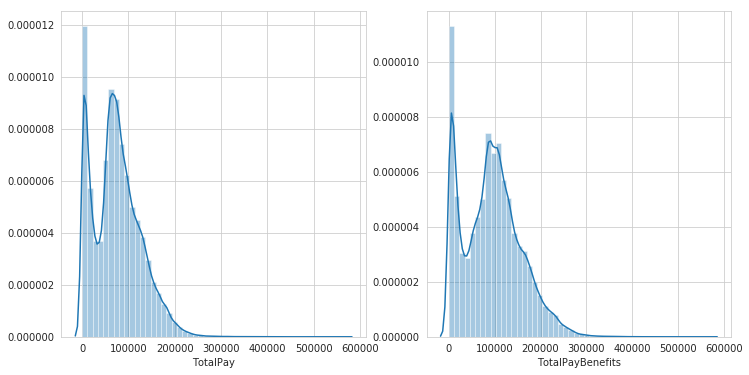

In [38]:
# Plot these diagrams in a dashboard with one rows and two columns

f, axes = plt.subplots(1, 2, figsize=(12, 6))

# Your code here
sns.distplot(sal['TotalPay'], ax=axes[0])
sns.distplot(sal['TotalPayBenefits'], ax=axes[1])

plt.show()

**Analize richest people**

In [39]:
# Select people that have TotalPayBenefit greater than $300k
# Your code here
sal[sal['TotalPayBenefits'] > 300000]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF 2,118602.00,8601.00,189082.74,0.00,316285.74,316285.74,2011
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.00,315981.05,315981.05,2011
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,0.00,307899.46,307899.46,2011
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.00,303427.55,303427.55,2011
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,0.00,302377.73,302377.73,2011


In [0]:
def split_income_type(n):
    if n < 1000:
        return 'Retired'
    elif n < 50000:
        return 'Low Income'
    elif n < 150000:
        return 'Midrange'
    elif n < 250000:
        return 'High Income'
    else:
        return 'Millionaire'

In [0]:
# Apply the function above to create a new column name IncomeType from TotalPayBenefits
# Fill the blank
sal['IncomeType'] = sal['TotalPayBenefits'].apply(split_income_type)

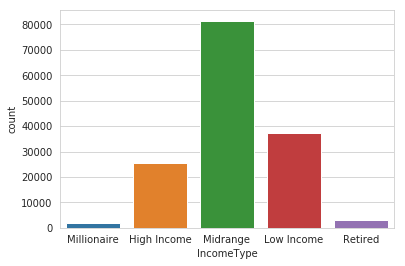

In [42]:
sns.countplot(sal['IncomeType'])
# What can you tell?

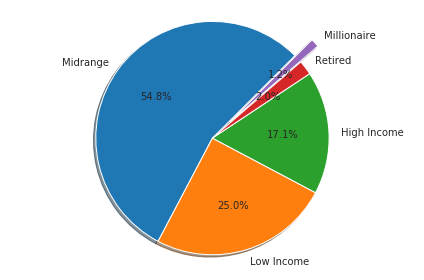

In [43]:
# Pie chart
labels = []
sizes = []
explode = []

labels = sal['IncomeType'].value_counts().index
for index, size in enumerate(sal['IncomeType'].value_counts()):
    sizes.append(size)
    if labels[index]=='Millionaire':
        explode.append(0.2)
    else: # add high income too?
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

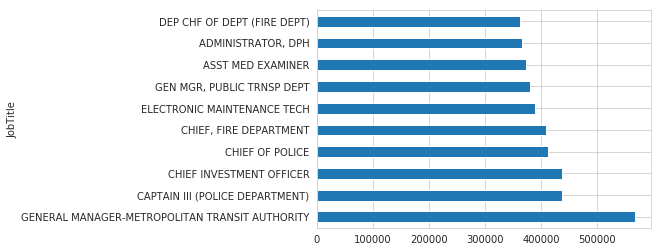

In [44]:
# What is the top 10 Job Title of Millionaire
# Fill the blank
millionare_jobs = sal[sal['TotalPayBenefits']>300000].groupby('JobTitle').mean()
millionare_jobs.sort_values(by=['TotalPayBenefits'], ascending=False)['TotalPayBenefits'].head(10).plot(kind='barh')

In [47]:
# Find the name of 10 richest man
# Your code here
richest_man = sal.sort_values(by=['TotalPayBenefits'], ascending=False)[['EmployeeName', 'JobTitle']].head(10).values
richest_man

array([['NATHANIEL FORD',
        'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'],
       ['GARY JIMENEZ', 'CAPTAIN III (POLICE DEPARTMENT)'],
       ['DAVID SHINN', 'DEPUTY CHIEF 3'],
       ['AMY P HART', 'ASST MED EXAMINER'],
       ['WILLIAM J COAKER JR.', 'CHIEF INVESTMENT OFFICER'],
       ['GREGORY P SUHR', 'CHIEF OF POLICE'],
       ['JOANNE M HAYES-WHITE', 'CHIEF, FIRE DEPARTMENT'],
       ['GREGORY P SUHR', 'CHIEF OF POLICE'],
       ['JOANNE M HAYES-WHITE', 'CHIEF, FIRE DEPARTMENT'],
       ['ELLEN G MOFFATT', 'ASST MED EXAMINER']], dtype=object)

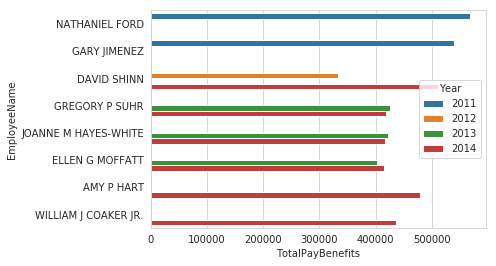

In [48]:
# Analyze TotalPayBenefits of 10 richest man each Year
# Your code here
rich_data = sal[sal['EmployeeName'].isin(richest_man[:,0]) & sal['JobTitle'].isin(richest_man[:,1])]
sns.barplot(data=rich_data, y='EmployeeName', x='TotalPayBenefits', hue='Year')

### You are awesome!!